In [1]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
import numpy as np
import sys,os
sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/CAMELS/MIEST/utils/"))
from imp import reload 
# Change in mymodule/'
import vib_utils
reload(vib_utils)
from vib_utils import *
import mist_utils
reload(mist_utils)
from mist_utils import *
# read data
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency

In [3]:
mist.train_loader.batch_size

128

You can't use monopole with projection!
Turning off monopole...
epoch 0  | loss: 8.05151 | train_rmsle: 0.03311000019311905| train_mae: 0.2300799936056137| train_rmse: 0.2581300139427185| train_mse: 0.06662999838590622| valid_rmsle: 0.03277000039815903| valid_mae: 0.231330007314682| valid_rmse: 0.25867000222206116| valid_mse: 0.06690999865531921|  0:00:02s
epoch 1  | loss: 4.57959 | train_rmsle: 0.006750000175088644| train_mae: 0.1056400015950203| train_rmse: 0.12477999925613403| train_mse: 0.015569999814033508| valid_rmsle: 0.006810000166296959| valid_mae: 0.10543999820947647| valid_rmse: 0.12489999830722809| valid_mse: 0.015599999576807022|  0:00:03s
epoch 2  | loss: 2.16499 | train_rmsle: 0.0062500000931322575| train_mae: 0.10221000015735626| train_rmse: 0.11868000030517578| train_mse: 0.014089999720454216| valid_rmsle: 0.006279999855905771| valid_mae: 0.10057000070810318| valid_rmse: 0.11801999807357788| valid_mse: 0.013930000364780426|  0:00:04s
epoch 3  | loss: 0.92012 | train_rm

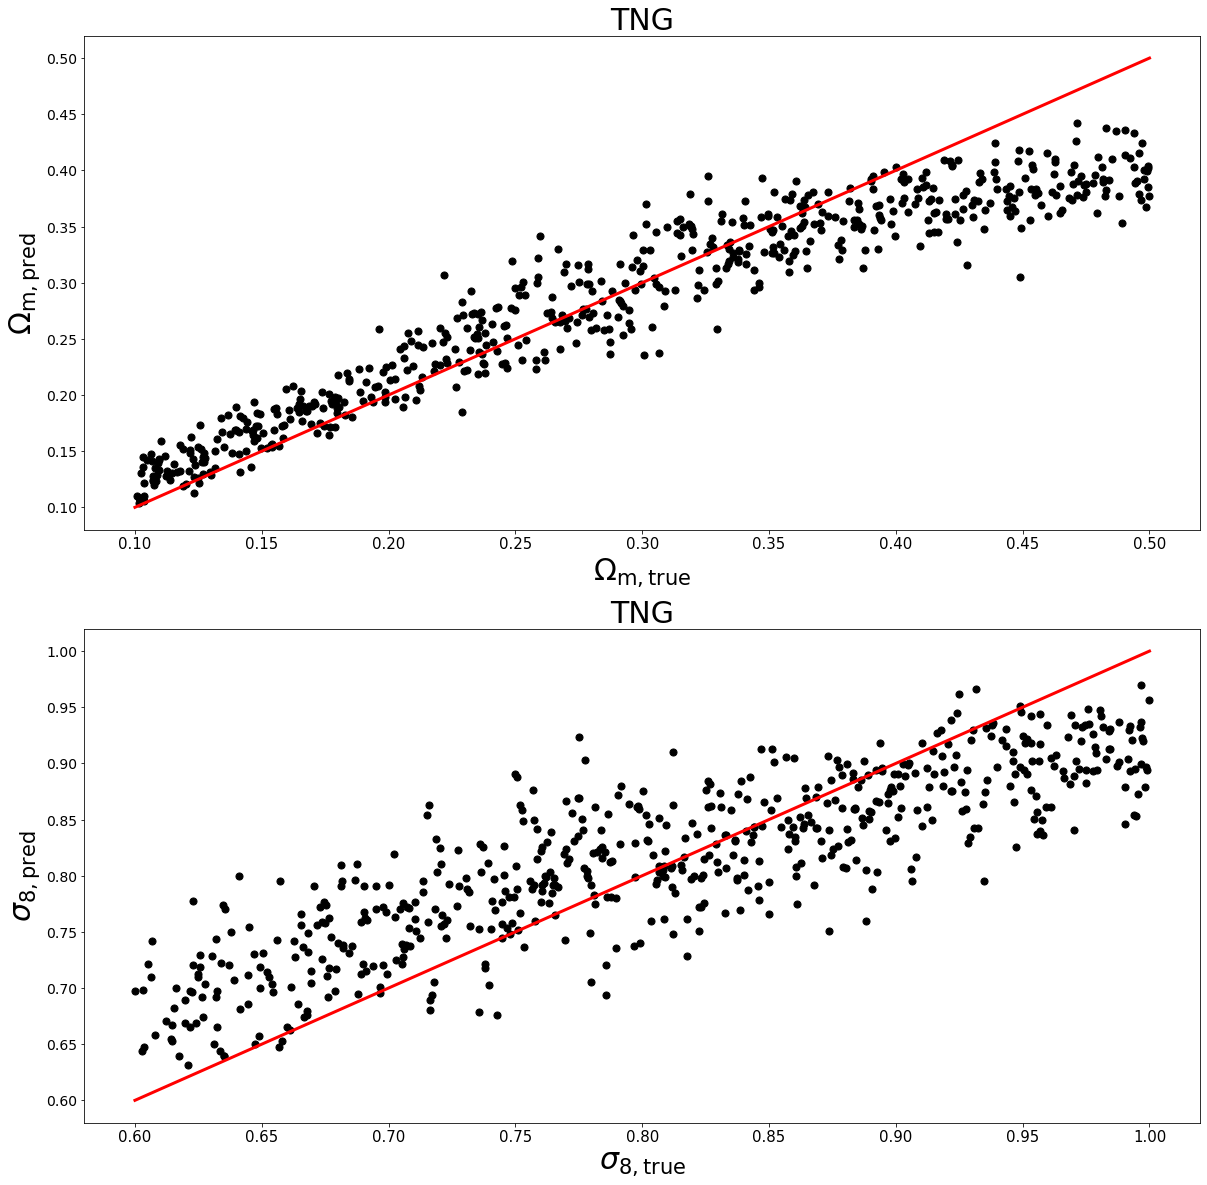

In [2]:
field = 'Mtot';
sim   = 'TNG' #['TNG', 'SIMBA']
norm = True
mono = False
average=False
projection=True
def loss_fn(true,pred):
    loss = (true-pred)**2
    return torch.sum(torch.log(torch.sum(loss,axis=0)))
mist = MIST(sim=sim,field=field, normalization=norm, monopole=mono, average=average,batch_size=128,L=4, dn=0, projection=projection)
mist.train(which_machine='tabnet',epochs=3000, loss_fn=loss_fn)
mist.make_plots(save_plot=False)

epoch 0  | loss: 5.94948 | train_rmsle: 0.06418000161647797| train_mae: 0.33331000804901123| train_rmse: 0.3763999938964844| train_mse: 0.14168000221252441| valid_rmsle: 0.06502000242471695| valid_mae: 0.33507001399993896| valid_rmse: 0.38047999143600464| valid_mse: 0.14475999772548676|  0:00:04s
epoch 1  | loss: 3.26254 | train_rmsle: 0.008460000157356262| train_mae: 0.11794000118970871| train_rmse: 0.14336000382900238| train_mse: 0.020549999549984932| valid_rmsle: 0.008870000019669533| valid_mae: 0.12131000310182571| valid_rmse: 0.1462700068950653| valid_mse: 0.021400000900030136|  0:00:08s
epoch 2  | loss: 1.57077 | train_rmsle: 0.006279999855905771| train_mae: 0.10182999819517136| train_rmse: 0.11777999997138977| train_mse: 0.013869999907910824| valid_rmsle: 0.006300000008195639| valid_mae: 0.09954000264406204| valid_rmse: 0.11655999720096588| valid_mse: 0.01358999963849783|  0:00:12s
epoch 3  | loss: 1.17348 | train_rmsle: 0.007019999902695417| train_mae: 0.1049799993634224| train

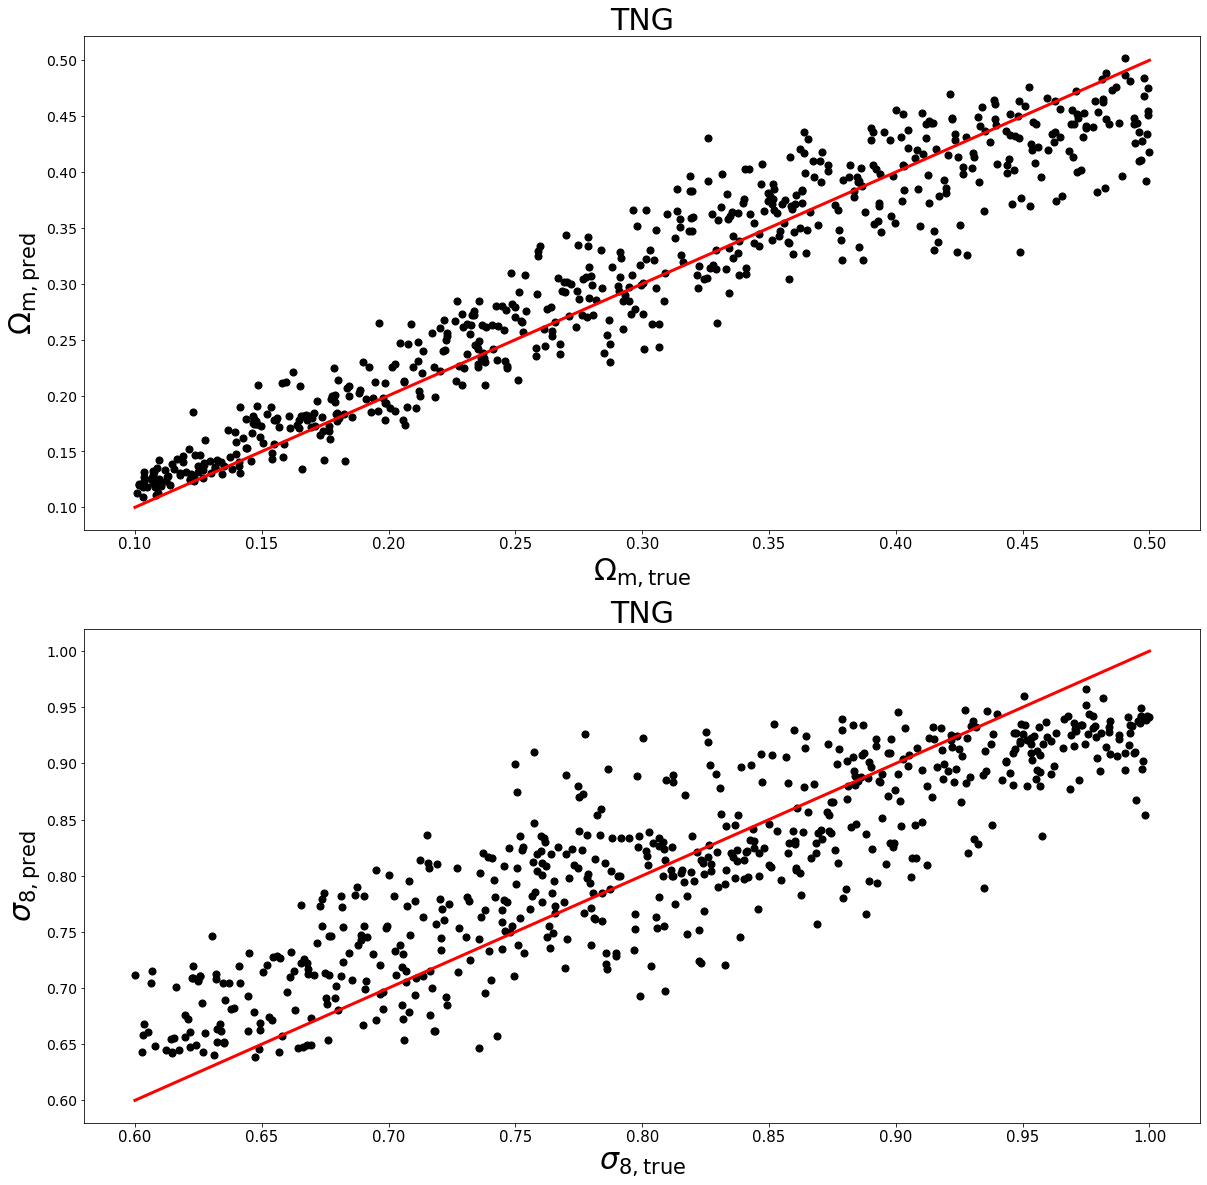

In [14]:
field = 'Mtot';
sim   = 'TNG' #['TNG', 'SIMBA']
norm = True
mono = False
average=False
projection=True
def loss_fn(true,pred):
    loss = (true-pred)**2
    return torch.sum(torch.log(torch.sum(loss,axis=0)))
mist = MIST(sim=sim,field=field, normalization=norm, monopole=mono, average=average,batch_size=128,L=10, dn=4, projection=projection)
mist.train(which_machine='tabnet',epochs=3000, loss_fn=loss_fn)
mist.make_plots(save_plot=False)

In [19]:
l=0
y_true, y_pred = mist.make_plots(save_plot=False,show_plot=False,data_return=True)
y_true, y_pred = np.array(y_true).reshape(600,2), np.array(y_pred).reshape(600,2)
RMSE = np.sqrt(mean_squared_error(y_true[:,0], y_pred[:,0]))
R2   = r2_score(y_true[:,0], y_pred[:,0])
PCC  = pearsonr(y_true[:,0], y_pred[:,0])[0]
RMSE, R2 ,PCC

(0.03355087229013598, 0.9173574809549617, 0.9592476324980824)

In [20]:
RMSE = np.sqrt(mean_squared_error(y_true[:,1], y_pred[:,1]))
R2   = r2_score(y_true[:,1], y_pred[:,1])
PCC  = pearsonr(y_true[:,1], y_pred[:,1])[0]
RMSE, R2 ,PCC

(0.05413539696389038, 0.7591749704082749, 0.8760455125527853)

epoch 0  | loss: 12.0128 | train_rmsle: 0.03683999925851822| train_mae: 0.2551400065422058| train_rmse: 0.29826000332832336| train_mse: 0.08895999938249588| valid_rmsle: 0.036740001291036606| valid_mae: 0.25481000542640686| valid_rmse: 0.29787999391555786| valid_mse: 0.08873999863862991|  0:00:03s
epoch 1  | loss: 8.31432 | train_rmsle: 0.009999999776482582| train_mae: 0.11991000175476074| train_rmse: 0.14560000598430634| train_mse: 0.021199999377131462| valid_rmsle: 0.009990000165998936| valid_mae: 0.12025000154972076| valid_rmse: 0.14565999805927277| valid_mse: 0.021220000460743904|  0:00:07s
epoch 2  | loss: 6.03042 | train_rmsle: 0.006390000227838755| train_mae: 0.1032399982213974| train_rmse: 0.12131000310182571| train_mse: 0.014720000326633453| valid_rmsle: 0.006370000075548887| valid_mae: 0.10306999832391739| valid_rmse: 0.12135999649763107| valid_mse: 0.0147299999371171|  0:00:11s
epoch 3  | loss: 5.12831 | train_rmsle: 0.005869999993592501| train_mae: 0.09848000109195709| trai

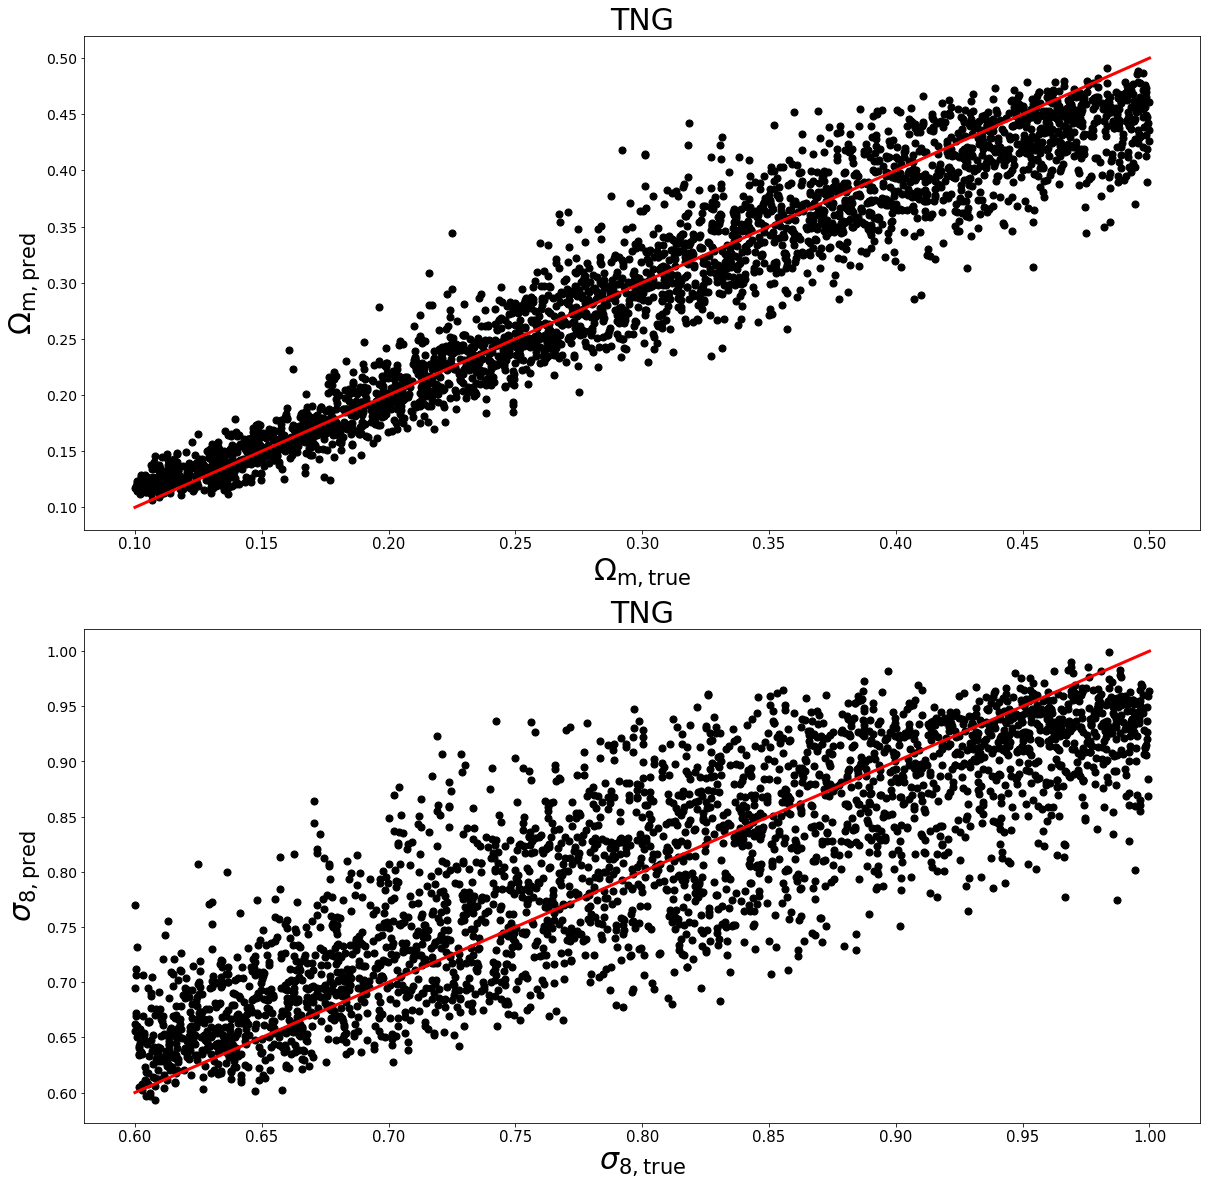

In [106]:
field = 'T';
sim   = 'TNG' #['TNG', 'SIMBA']
norm = True
mono = True
average=False
def loss_fn(true,pred):
    loss = (true-pred)**2
    return torch.sum(torch.log(torch.sum(loss,axis=0)))
mist = MIST(sim=sim,field=field, normalization=norm, monopole=mono, average=average,batch_size=1024,extended_L=7, extended_dn=4)
mist.train(which_machine='tabnet',epochs=3000, loss_fn=loss_fn)
mist.make_plots(save_plot=False)

In [107]:
l=0
y_true, y_pred = mist.make_plots(save_plot=False,show_plot=False,data_return=True)
y_true, y_pred = np.array(y_true).reshape(3000,2), np.array(y_pred).reshape(3000,2)
RMSE = np.sqrt(mean_squared_error(y_true[:,0], y_pred[:,0]))
R2   = r2_score(y_true[:,0], y_pred[:,0])
PCC  = pearsonr(y_true[:,0], y_pred[:,0])[0]
RMSE, R2 ,PCC

(0.031121776253437337, 0.9265712393497121, 0.9647233653774863)

In [108]:
RMSE = np.sqrt(mean_squared_error(y_true[:,1], y_pred[:,1]))
R2   = r2_score(y_true[:,1], y_pred[:,1])
PCC  = pearsonr(y_true[:,1], y_pred[:,1])[0]
RMSE, R2 ,PCC

(0.05824677203601491, 0.7498591108926844, 0.8665534953256817)

In [ ]:
X,y=mist.make_plots(save_plot=False,show_plot=False,data_return=True)

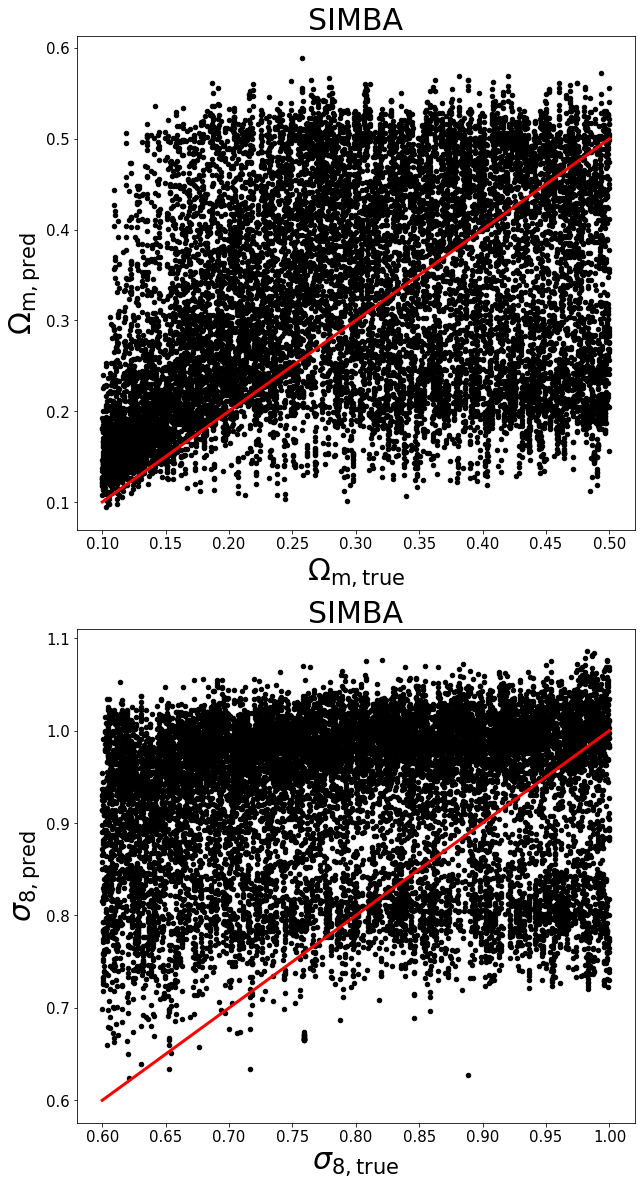

In [56]:
mist.test_on(sims="SIMBA", fname='', data_return=False,show_plot=True, show_score=False, save_plot=False)

epoch 0  | loss: 13.24658| train_rmsle: 0.03754999861121178| train_mae: 0.2579900026321411| train_rmse: 0.2992500066757202| train_mse: 0.08955000340938568| valid_rmsle: 0.037470001727342606| valid_mae: 0.2576200067996979| valid_rmse: 0.2989400029182434| valid_mse: 0.089369997382164|  0:00:01s
epoch 1  | loss: 9.90797 | train_rmsle: 0.011389999650418758| train_mae: 0.12917999923229218| train_rmse: 0.160630002617836| train_mse: 0.025800000876188278| valid_rmsle: 0.011090000160038471| valid_mae: 0.12771999835968018| valid_rmse: 0.15828999876976013| valid_mse: 0.025059999898076057|  0:00:02s
epoch 2  | loss: 6.88728 | train_rmsle: 0.00798999983817339| train_mae: 0.1141899973154068| train_rmse: 0.13792000710964203| train_mse: 0.019020000472664833| valid_rmsle: 0.007960000075399876| valid_mae: 0.11386000365018845| valid_rmse: 0.13784000277519226| valid_mse: 0.01899999938905239|  0:00:03s
epoch 3  | loss: 5.60725 | train_rmsle: 0.00634999992325902| train_mae: 0.10253000259399414| train_rmse: 

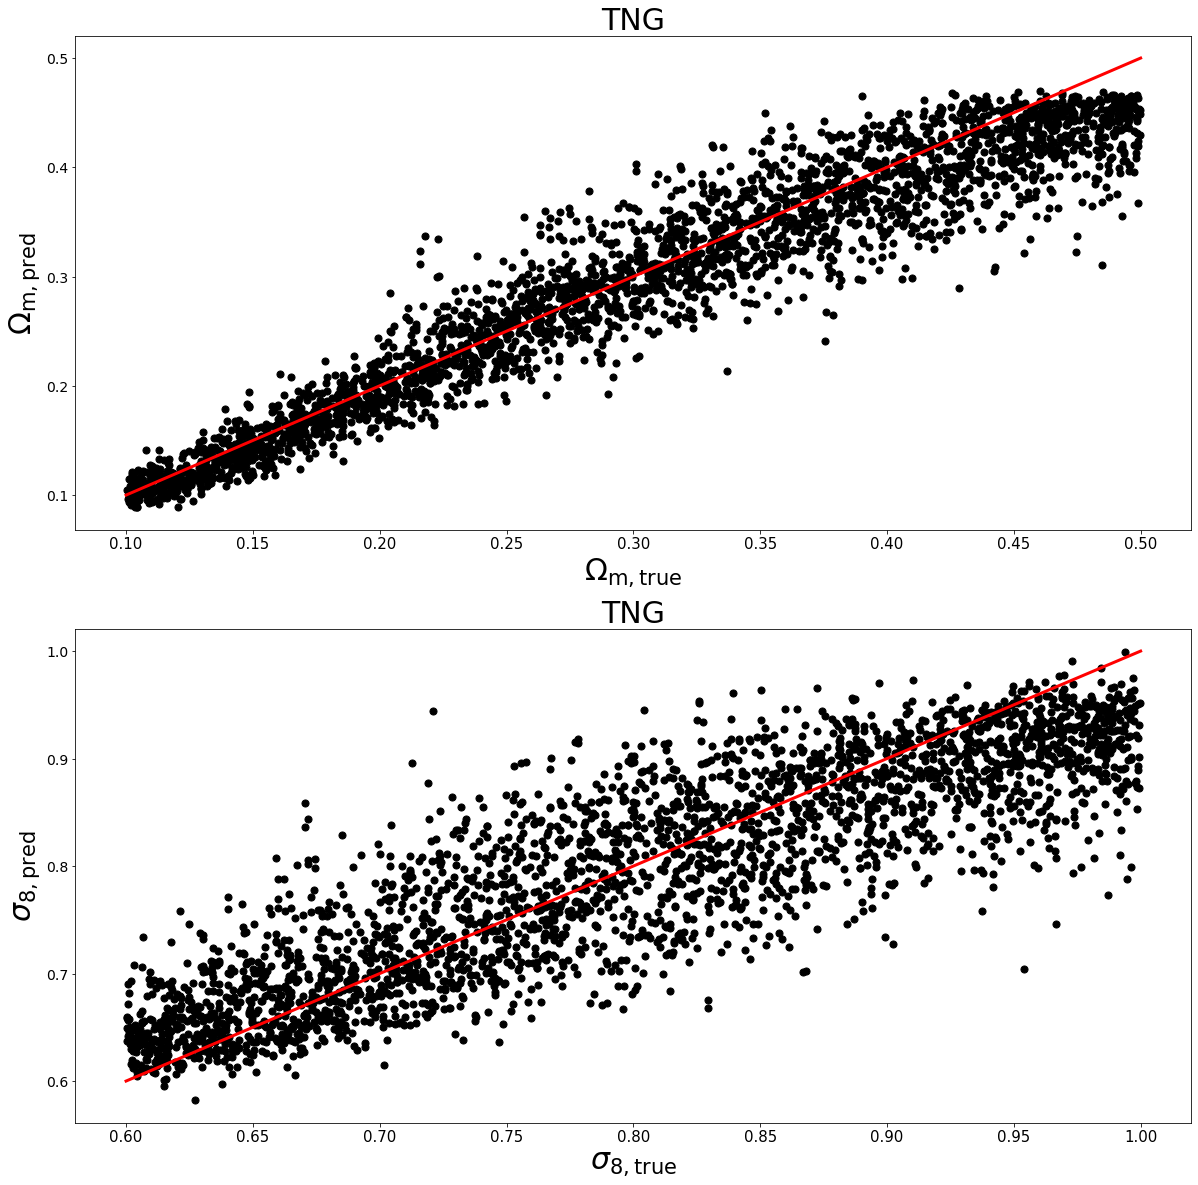

In [51]:
field = 'T';
sim   = 'TNG' #['TNG', 'SIMBA']
norm = True
mono = False
average=False
def loss_fn(true,pred):
    loss = (true-pred)**2
    return torch.sum(torch.log(torch.sum(loss,axis=0)))
mist = MIST(sim=sim,field=field, normalization=norm, monopole=mono, average=average,batch_size=1024)
mist.train(which_machine='tabnet',epochs=3000, loss_fn=loss_fn)
mist.make_plots(save_plot=False)

epoch 0  | loss: 0.87127 | train_rmsle: 0.05076000094413757| train_mae: 0.2964800000190735| train_rmse: 0.3440600037574768| train_mse: 0.11836999654769897| valid_rmsle: 0.050620000809431076| valid_mae: 0.29613998532295227| valid_rmse: 0.3435800075531006| valid_mse: 0.11804000288248062|  0:00:01s
epoch 1  | loss: 0.1291  | train_rmsle: 0.08241000026464462| train_mae: 0.3373900055885315| train_rmse: 0.4256100058555603| train_mse: 0.18115000426769257| valid_rmsle: 0.08261000365018845| valid_mae: 0.33695998787879944| valid_rmse: 0.425819993019104| valid_mse: 0.18132999539375305|  0:00:02s
epoch 2  | loss: 0.03868 | train_rmsle: 0.11388999968767166| train_mae: 0.3977600038051605| train_rmse: 0.48137998580932617| train_mse: 0.23172999918460846| valid_rmsle: 0.11384999752044678| valid_mae: 0.3981800079345703| valid_rmse: 0.4812699854373932| valid_mse: 0.23161999881267548|  0:00:03s
epoch 3  | loss: 0.01793 | train_rmsle: 0.006240000016987324| train_mae: 0.10194999724626541| train_rmse: 0.1181

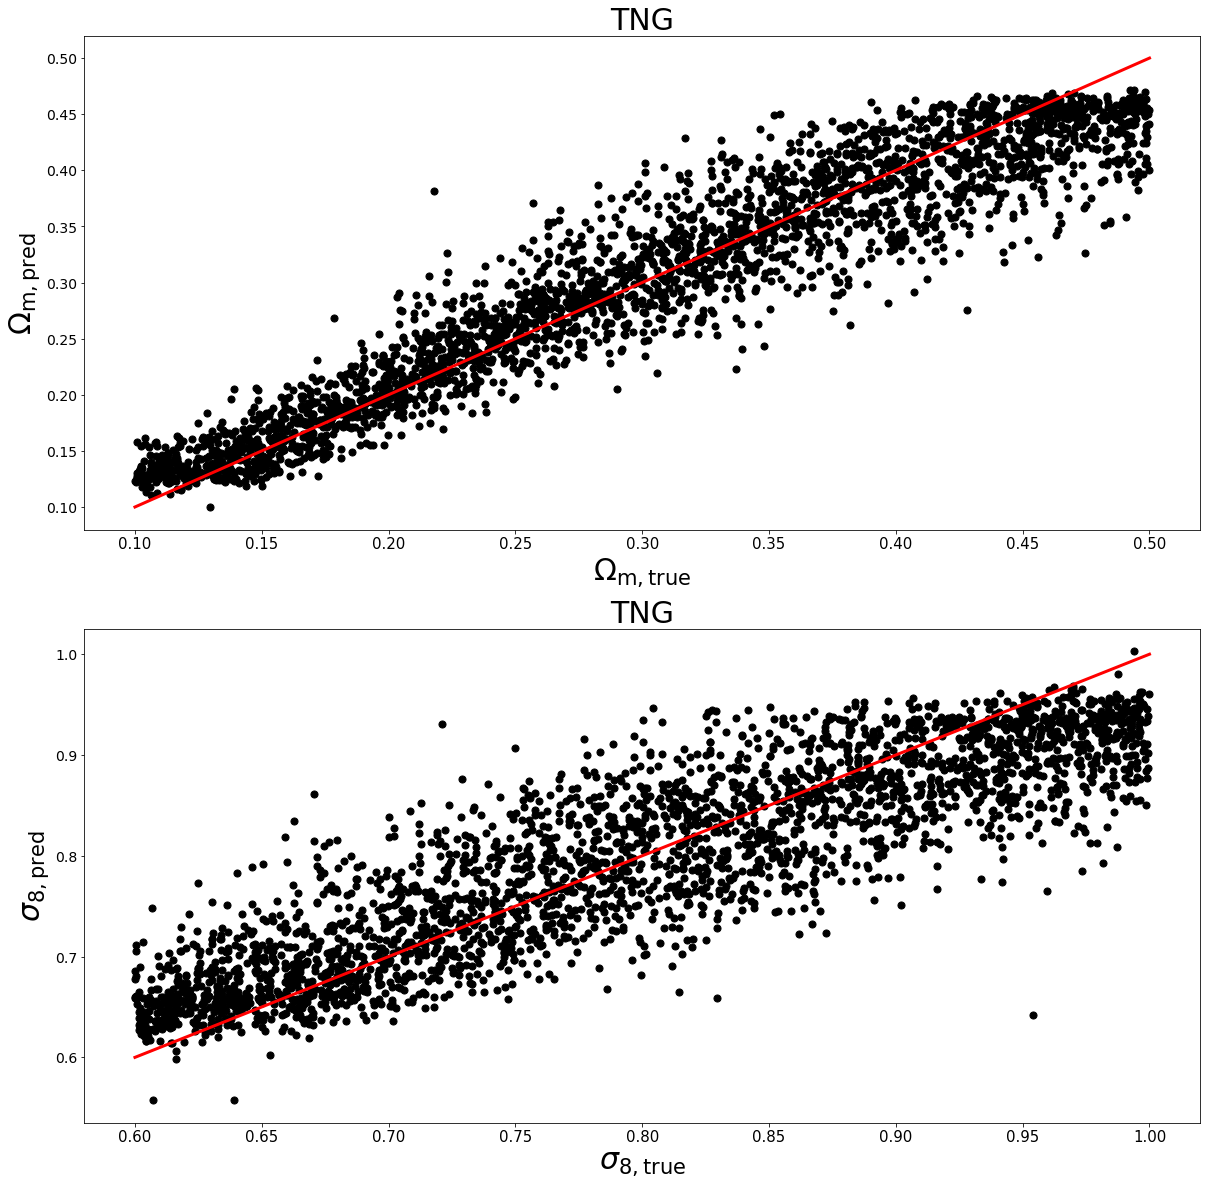

In [47]:
field = 'T';
sim   = 'TNG' #['TNG', 'SIMBA']
norm = True
mono = False
average=False

mist = MIST(sim=sim,field=field, normalization=norm, monopole=mono, average=average)
mist.train(which_machine='tabnet',epochs=3000)
mist.make_plots(save_plot=False)

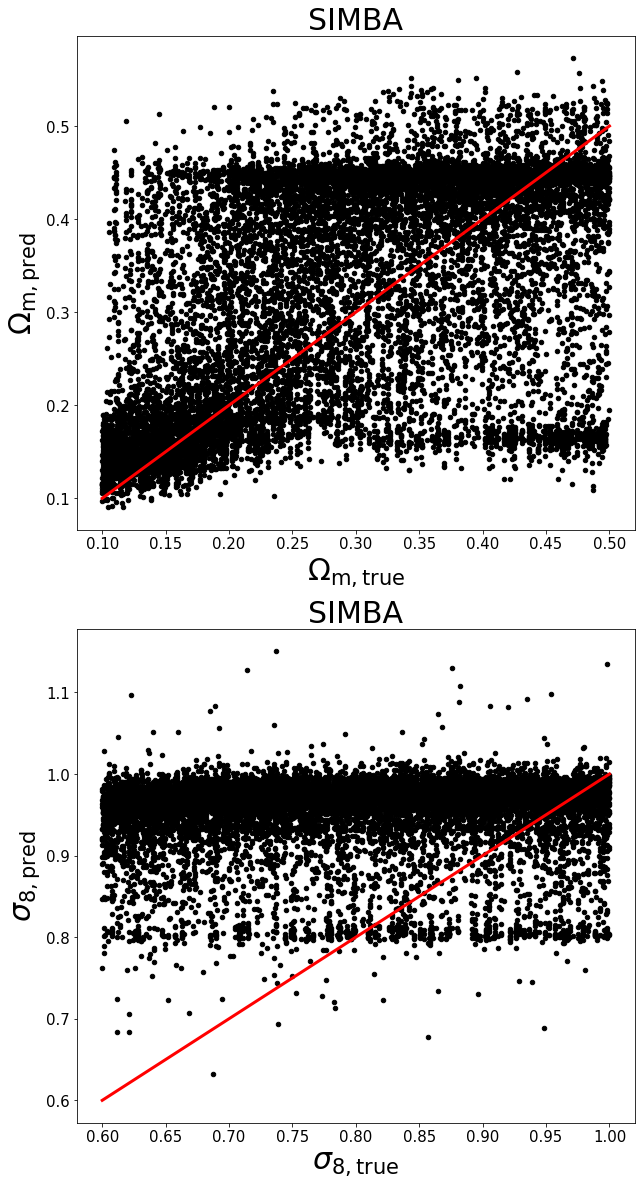

In [48]:
mist.test_on(sims="SIMBA", fname='', data_return=False,show_plot=True, show_score=False, save_plot=False)